In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('C:\\Users\\CWC\\Downloads\\Melbourne_housing_FULL.csv\\Melbourne_housing_FULL.csv')

In [3]:
df_train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Data Cleaning

In [4]:
null_sum = df_train.isnull().sum().sort_values(ascending=False)

In [5]:
total_count = df_train.isnull().count().sort_values(ascending=False)

In [6]:
percent = (null_sum/total_count *100)

In [7]:
percent.sort_values(ascending=False)

BuildingArea     60.576068
YearBuilt        55.386293
Landsize         33.881286
Car              25.039447
Bathroom         23.599277
Bedroom2         23.573457
Lattitude        22.882061
Longtitude       22.882061
Price            21.832057
CouncilArea       0.008607
Propertycount     0.008607
Regionname        0.008607
Distance          0.002869
Postcode          0.002869
Date              0.000000
Method            0.000000
Rooms             0.000000
SellerG           0.000000
Suburb            0.000000
Type              0.000000
Address           0.000000
dtype: float64

In [8]:
missing_data = pd.concat([null_sum, percent], axis=1, keys=['null_sum', 'percent'])

In [9]:
missing_data

,null_sum,percent
BuildingArea,21115,60.576068
YearBuilt,19306,55.386293
Landsize,11810,33.881286
Car,8728,25.039447
Bathroom,8226,23.599277
Bedroom2,8217,23.573457
Longtitude,7976,22.882061
Lattitude,7976,22.882061
Price,7610,21.832057
Regionname,3,0.008607


In [10]:
df_train = df_train.drop((missing_data[missing_data['null_sum'] >3]).index, axis=1)

In [11]:
df_train.isnull().sum().sort_values(ascending=False)

CouncilArea      3
Regionname       3
Propertycount    3
Distance         1
Postcode         1
Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
dtype: int64

In [12]:
df_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/2/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/2/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/3/2017,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0


In [13]:
df_train.isnull().sum()
df_train.shape

(34857, 12)

In [14]:
# df_train[df_train['CouncilArea'].isna() == True]
df_train = df_train.dropna(axis=0)

In [15]:
df_train.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [16]:
df_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/2/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/2/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/3/2017,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0


In [17]:
df_train['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

In [18]:
df_train['CouncilArea'] = df_train['CouncilArea'].str[:-8]

In [19]:
df_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,Yarra City,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,Yarra City,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/2/2016,2.5,3067.0,Yarra City,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/2/2016,2.5,3067.0,Yarra City,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/3/2017,2.5,3067.0,Yarra City,Northern Metropolitan,4019.0


In [20]:
df_train['Rooms'].unique()

array([ 2,  3,  4,  1,  5,  6,  7,  8, 10,  9, 12, 16], dtype=int64)

In [21]:
rooms_per_region = pd.DataFrame(df_train.groupby('Rooms'))

# rooms_per_region.plot(kind='bar', edgecolor='Black')
rooms_per_region

,0,1
0,1,Suburb Address ...
1,2,Suburb Address Rooms T...
2,3,Suburb Address Rooms T...
3,4,Suburb Address Rooms T...
4,5,Suburb Address Rooms ...
5,6,Suburb Address R...
6,7,Suburb Address Room...
7,8,Suburb Address R...
8,9,Suburb Address Rooms Ty...
9,10,Suburb Address Rooms Ty...


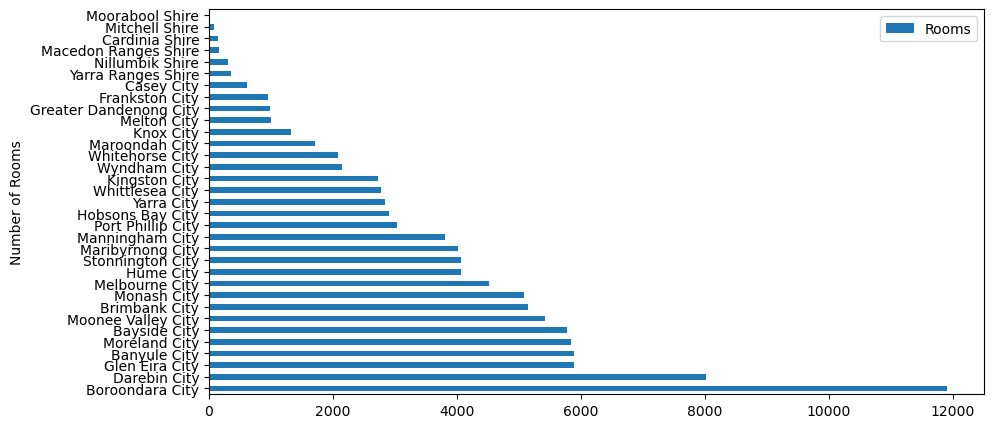

In [22]:
rooms_per_council = pd.DataFrame(df_train.groupby('CouncilArea').sum()['Rooms']).sort_values(by='Rooms',ascending=False)

rooms_per_council.plot(kind='barh',figsize=(10,5), xlabel='Number of Rooms' )
plt.show()